### Here we will poke around and test at some correllation tests and plots before deciding on a data story to tell in another notebook

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import nltk
import datetime
import math
#from sqlalchemy import create_engine
#nltk.download()

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook



In [2]:
Housing_data = pd.read_csv('cleaned_1.csv')
Housing_data = Housing_data.set_index(['parcelid','Unnamed: 1'])
del Housing_data['garagetotalsqft']
Housing_data.head()

,,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,garagecarcnt,...,bathroom_number_category,decktypeid,poolsizesum,yardbuildingsqft17,yardbuildingsqft26,fireplacecnt,taxdelinquencyyear,pooltypeid,transactiondate,logerror
parcelid,Unnamed: 1,,,,,,,,,,,,,,,,,,,,,
17073783,0,-1,2,3.0,-1,2.5,1264.0,1264.0,6111,2,2,...,0,0,0.0,128.0,0.0,0,NaN,0,2016-01-27,0.0953
17088994,1,-1,1,2.0,-1,1.0,777.0,777.0,6111,1,1,...,1,0,0.0,198.0,0.0,0,NaN,0,2016-03-30,0.0198
17100444,2,-1,2,3.0,-1,2.0,1101.0,1101.0,6111,2,2,...,2,0,0.0,0.0,0.0,0,NaN,0,2016-05-27,0.0060
17102429,3,-1,1,2.0,-1,1.5,1554.0,1554.0,6111,1,2,...,3,0,0.0,0.0,0.0,1,NaN,0,2016-06-07,-0.0566
17109604,4,-1,2,4.0,-1,2.5,2415.0,2415.0,6111,2,2,...,0,0,0.0,0.0,0.0,1,NaN,0,2016-08-08,0.0573


In [3]:
Housing_data.describe()

,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,garagecarcnt,...,taxamount,censustractandblock,bathroom_number_category,decktypeid,poolsizesum,yardbuildingsqft17,yardbuildingsqft26,fireplacecnt,pooltypeid,logerror
count,167805.000000,167805.000000,167805.000000,167805.000000,166056.000000,166992.000000,159519.000000,167805.000000,167805.000000,167805.000000,...,167794.000000,1.670020e+05,167805.000000,167805.000000,167805.000000,167805.000000,167805.000000,167805.000000,167805.000000,167805.000000
mean,-0.097893,2.223432,3.042627,3.480605,2.312542,1778.630246,1752.326939,6048.835690,2.211519,-0.070177,...,5989.373165,6.049390e+13,2.572945,0.007580,5.683949,9.246471,0.266726,0.126850,0.983654,0.013914
std,2.133755,0.988540,1.148126,3.690774,0.977808,940.356025,921.360898,20.690315,1.014684,1.367576,...,7212.175482,1.054137e+12,2.081016,0.086734,56.416211,65.685803,12.511396,0.400143,1.957168,0.165487
min,-1.000000,0.000000,0.000000,-1.000000,1.000000,2.000000,2.000000,6037.000000,-1.000000,-1.000000,...,19.920000,6.037101e+13,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.655420
25%,-1.000000,2.000000,2.000000,-1.000000,2.000000,1183.000000,1172.000000,6037.000000,2.000000,-1.000000,...,2799.002500,6.037312e+13,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.025300
50%,-1.000000,2.000000,3.000000,4.000000,2.000000,1541.000000,1520.000000,6037.000000,2.000000,-1.000000,...,4501.435000,6.037604e+13,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006000
75%,1.000000,3.000000,4.000000,7.000000,3.000000,2103.000000,2065.000000,6059.000000,3.000000,2.000000,...,6914.630000,6.059042e+13,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039200
max,13.000000,20.000000,16.000000,12.000000,20.000000,35640.000000,21929.000000,6111.000000,20.000000,24.000000,...,586639.300000,4.830301e+14,21.000000,1.000000,1750.000000,3191.000000,1366.000000,5.000000,5.000000,5.262999


In [4]:
Housing_data['transactiondate'] = pd.to_datetime(Housing_data['transactiondate'], format = '%Y-%m-%d', errors = 'coerce')
#Housing_data['yearbuilt'] = pd.to_datetime(Housing_data['yearbuilt'], format='%Y-%m-%d', errors='coerce')
Housing_data['yearbuilt'] = pd.to_datetime(Housing_data['yearbuilt'], format='%Y.0', errors='coerce').dt.year

Housing_data['assessmentyear'] = pd.to_datetime(Housing_data['assessmentyear'], format='%Y-%m-%d', errors='coerce').dt.year
Housing_data['taxdelinquencyyear'] = pd.to_datetime(Housing_data['taxdelinquencyyear'], format='%Y-%m-%d', errors='coerce').dt.year


In [5]:
Housing_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 167805 entries, (17073783, 0) to (14737537, 77578)
Data columns (total 41 columns):
airconditioningtypeid           167805 non-null int64
bathroomcnt                     167805 non-null int64
bedroomcnt                      167805 non-null float64
buildingqualitytypeid           167805 non-null int64
calculatedbathnbr               166056 non-null float64
calculatedfinishedsquarefeet    166992 non-null float64
finishedsquarefeet12            159519 non-null float64
fips                            167805 non-null int64
fullbathcnt                     167805 non-null int64
garagecarcnt                    167805 non-null int64
heatingorsystemtypeid           167805 non-null int64
latitude                        167805 non-null float64
longitude                       167805 non-null float64
lotsizesquarefeet               149427 non-null float64
propertycountylandusecode       167805 non-null int64
propertylandusetypeid           167805 non

## First organize columns into continuous, ordinal, categorical etc.

In [6]:
cont_cols = ['calculatedfinishedsquarefeet','finishedsquarefeet12','latitude','longitude',
            'lotsizesquarefeet','taxvaluedollarcnt','taxamount','poolsizesum','propertyzoningdesc',
             'yardbuildingsqft17','yardbuildingsqft26','rawcensustractandblock','censustractandblock']
ord_cols = ['buildingqualitytypeid','bathroomcnt','bedroomcnt','fullbathcnt','garagecarcnt','roomcnt','unitcnt',
           'fireplacecnt']
cat_cols = ['fips', 'propertycountylandusecode','propertylandusetypeid',
           'regionidcity','regionidneighborhood',
           'regionidzip','decktypeid','pooltypeid']
date_cols = ['yearbuilt','assessmentyear','taxdelinquencyyear','transactiondate']

In [7]:
for col in cont_cols:
    correl = Housing_data[col].corr(Housing_data['logerror'])
    print(col, correl)

calculatedfinishedsquarefeet 0.0397104454726
finishedsquarefeet12 0.0439771169822
latitude -0.00272465842701
longitude 0.00534421808767
lotsizesquarefeet 0.00782646325608
taxvaluedollarcnt 0.00429764167844
taxamount -0.00309989704541
poolsizesum -0.00419437423264
propertyzoningdesc 0.00217036976099
yardbuildingsqft17 -0.00195256361826
yardbuildingsqft26 -0.00171845300943
rawcensustractandblock 0.00743580710626
censustractandblock 0.00413171276405


In [8]:
for col in ord_cols:
    correl = Housing_data[col].corr(Housing_data['logerror'])
    print(col, correl)

buildingqualitytypeid -0.0100798852204
bathroomcnt 0.0262657981966
bedroomcnt 0.0287983458474
fullbathcnt 0.0247077272959
garagecarcnt 0.0108837384097
roomcnt 0.0100049500909
unitcnt -0.00626831555283
fireplacecnt 0.00509950477901


In [9]:
#for col in cat_cols:
   # print(Housing_data[[col, 'logerror']].groupby([col], 
                                             #as_index=False).mean().sort_values(by='logerror', ascending=False))

From the continuous columns we will look in depth into a few of them based on their correllation.

<IPython.core.display.Javascript object>


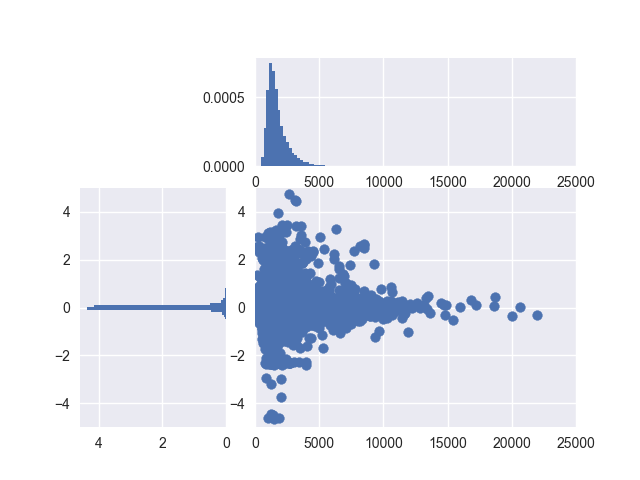

In [10]:
import matplotlib.gridspec as gridspec
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

space_df = Housing_data[['finishedsquarefeet12','logerror']].dropna()

lower_right.scatter(space_df['finishedsquarefeet12'],space_df['logerror'])
top_histogram.clear()
top_histogram.hist(space_df['finishedsquarefeet12'], bins=100, normed = True)
side_histogram.clear()
side_histogram.hist(space_df['logerror'], bins=100, orientation='horizontal', normed = True)
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 25000)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

<IPython.core.display.Javascript object>


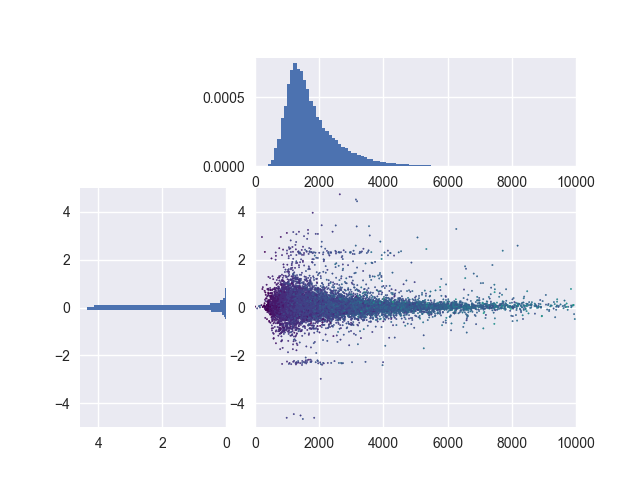

In [11]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

smallhousedf = Housing_data.drop(['taxdelinquencyyear'], axis = 1)
smallhousedf = smallhousedf.dropna()
smallhousedf=smallhousedf[smallhousedf['finishedsquarefeet12'] <= 10000]

lower_right.scatter(smallhousedf['finishedsquarefeet12'],smallhousedf['logerror'], 
                    c = smallhousedf['bedroomcnt'], s = 1, cmap = 'viridis')
#top_histogram.clear()
top_histogram.hist(smallhousedf['finishedsquarefeet12'], bins=100, normed = True)
#side_histogram.clear()
side_histogram.hist(smallhousedf['logerror'], bins=100, orientation='horizontal', normed = True)
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 10000)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

The most inaccurate estimates occur when the square footage is less than 1000 and even 4000

In [14]:
smallhousedf['yearbuiltint'] = smallhousedf['yearbuilt'].astype(int)

#smallhousedf['yearbuiltint']

<IPython.core.display.Javascript object>


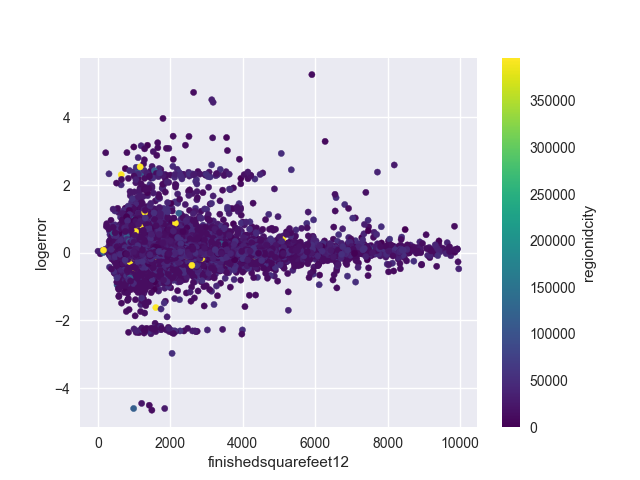

In [12]:
smallhousedf.plot.scatter('finishedsquarefeet12', 'logerror', c='regionidcity', 
                           colormap='viridis')

<IPython.core.display.Javascript object>


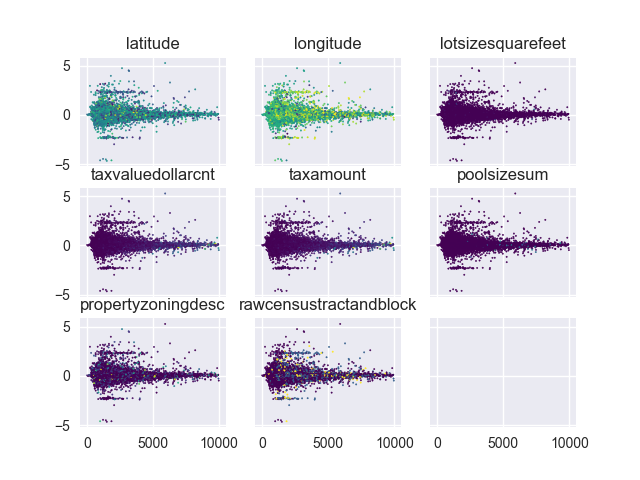

In [16]:
cont_cols_abr = ['latitude','longitude','lotsizesquarefeet','taxvaluedollarcnt',
                 'taxamount','poolsizesum','propertyzoningdesc','rawcensustractandblock','censustractandblock']
fig, ((x1,x2,x3), (x4,x5,x6), (x7,x8,x9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 

xs = [x1,x2,x3,x4,x5,x6,x7,x8]

for n in range(0, len(xs)):
    xs[n].scatter(smallhousedf['finishedsquarefeet12'],smallhousedf['logerror'], 
                    c = smallhousedf[cont_cols_abr[n]], s = 1, cmap = 'viridis')
    xs[n].set_title(cont_cols_abr[n])

<IPython.core.display.Javascript object>


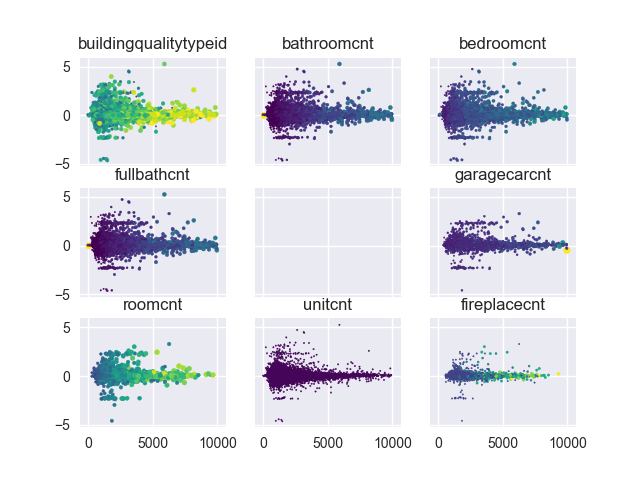

/anaconda/lib/python3.6/site-packages/matplotlib/collections.py:877: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [17]:
# create a 3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax9,ax5), (ax6,ax7,ax8)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 

axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]

for n in range(0, len(axs)):
    axs[n].scatter(smallhousedf['finishedsquarefeet12'],smallhousedf['logerror'], 
                    c = smallhousedf[ord_cols[n]], s = smallhousedf[ord_cols[n]], cmap = 'viridis')
    axs[n].set_title(ord_cols[n])

<IPython.core.display.Javascript object>


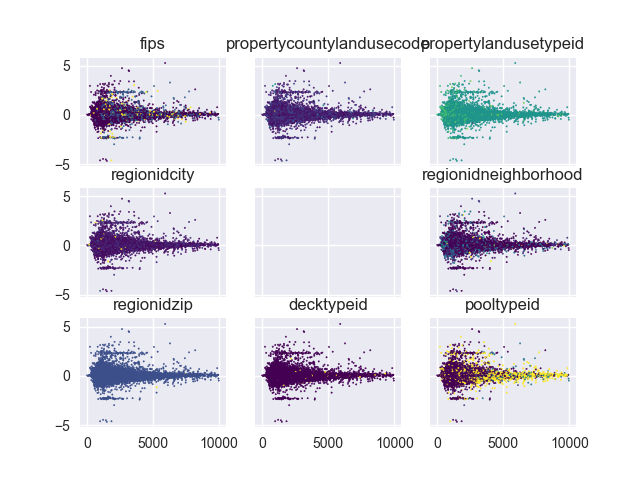

In [18]:
# create a 3x3 grid of subplots
fig, ((bx1,bx2,bx3), (bx4,bx9,bx5), (bx6,bx7,bx8)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 

bxs = [bx1,bx2,bx3,bx4,bx5,bx6,bx7,bx8]

for n in range(0, len(bxs)):
    bxs[n].scatter(smallhousedf['finishedsquarefeet12'],smallhousedf['logerror'], 
                    c = smallhousedf[cat_cols[n]], s = 1, cmap = 'viridis')
    bxs[n].set_title(cat_cols[n])

<IPython.core.display.Javascript object>


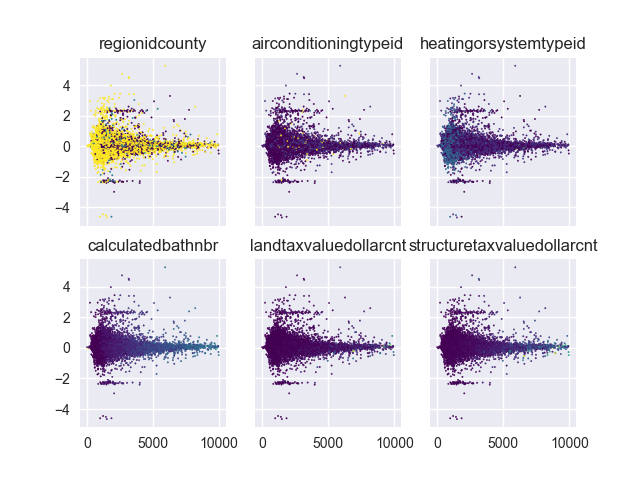

In [19]:
#del Housing_data['regionidcounty']
#del Housing_data['airconditioningtypeid']
#del Housing_data['heatingorsystemtypeid']
#del Housing_data['calculatedbathnbr']
#del Housing_data['landtaxvaluedollarcnt']
#del Housing_data['structuretaxvaluedollarcnt']
forgotten_cols = ['regionidcounty','airconditioningtypeid','heatingorsystemtypeid','calculatedbathnbr',
                 'landtaxvaluedollarcnt','structuretaxvaluedollarcnt']

# plot the linear_data on the 5th subplot axes 
fig, ((cx1,cx2,cx3), (cx4,cx5,cx6)) = plt.subplots(2,3, sharex=True, sharey=True)
cxs = [cx1,cx2,cx3,cx4,cx5,cx6]

for n in range(0, len(cxs)):
    cxs[n].scatter(smallhousedf['finishedsquarefeet12'],smallhousedf['logerror'], 
                    c = smallhousedf[forgotten_cols[n]], s = 1, cmap = 'viridis')
    cxs[n].set_title(forgotten_cols[n])

In [24]:
cols_to_drop = ['landtaxvaluedollarcnt','structuretaxvaluedollarcnt','regionidzip','decktypeid',
               'unitcnt','garagecarcnt','lotsizesquarefeet','taxvaluedollarcnt',
                 'taxamount','poolsizesum','censustractandblock','heatingorsystemtypeid',
               'calculatedbathnbr','airconditioningtypeid','propertylandusetypeid',
               'bathroomcnt','bedroomcnt','fullbathcnt',
               'roomcnt','propertycountylandusecode']
cols_to_keep = list(set(smallhousedf)-set(cols_to_drop))


anamoly_df = smallhousedf[((smallhousedf['logerror'] > 2) & (smallhousedf['logerror'] < 2.5)) | 
                         ((smallhousedf['logerror'] < -2) & (smallhousedf['logerror'] > -2.5))]

accurate_df = smallhousedf[(smallhousedf['logerror'] < 1.8) & (smallhousedf['logerror'] > -1.8)]

anamoly_df = anamoly_df[cols_to_keep].copy()
accurate_df = accurate_df[cols_to_keep].copy()
anamoly_df.describe()

,yearbuiltint,finishedsquarefeet12,yardbuildingsqft26,propertyzoningdesc,assessmentyear,calculatedfinishedsquarefeet,fireplacecnt,rawcensustractandblock,yardbuildingsqft17,pooltypeid,longitude,logerror,latitude,regionidcity,buildingqualitytypeid,regionidcounty,fips,bathroom_number_category,yearbuilt,regionidneighborhood
count,153.000000,153.000000,153.0,153.000000,153.0,153.000000,153.000000,1.530000e+02,153.000000,153.000000,1.530000e+02,153.000000,1.530000e+02,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,1967.816993,2136.947712,0.0,135.660131,1970.0,2136.947712,0.228758,6.054296e+07,14.137255,1.450980,-1.181239e+08,0.755194,3.389523e+07,32771.450980,1.732026,2122.928105,6054.071895,2.457516,1967.816993,52916.078431
std,21.557279,1073.617543,0.0,249.055615,0.0,1073.617543,0.556028,2.018885e+05,74.650066,2.170196,3.967396e+05,2.162005,2.561783e+05,35828.846419,3.554105,868.922905,20.341850,1.960085,21.557279,103944.240332
min,1896.000000,304.000000,0.0,-1.000000,1970.0,304.000000,0.000000,6.037107e+07,0.000000,0.000000,-1.192335e+08,-2.406257,3.335420e+07,-1.000000,-1.000000,1286.000000,6037.000000,-1.000000,1896.000000,-1.000000
25%,1956.000000,1401.000000,0.0,-1.000000,1970.0,1401.000000,0.000000,6.037541e+07,0.000000,0.000000,-1.183715e+08,-2.254000,3.372019e+07,12773.000000,-1.000000,1286.000000,6037.000000,1.000000,1956.000000,-1.000000
50%,1967.000000,1860.000000,0.0,4.000000,1970.0,1860.000000,0.000000,6.059032e+07,0.000000,0.000000,-1.180354e+08,2.207293,3.385430e+07,25458.000000,-1.000000,2061.000000,6059.000000,2.000000,1967.000000,-1.000000
75%,1980.000000,2679.000000,0.0,146.000000,1970.0,2679.000000,0.000000,6.059076e+07,0.000000,5.000000,-1.178073e+08,2.319867,3.410948e+07,46298.000000,4.000000,3101.000000,6059.000000,4.000000,1980.000000,31817.000000
max,2014.000000,7716.000000,0.0,1305.000000,1970.0,7716.000000,3.000000,6.111008e+07,627.000000,5.000000,-1.175820e+08,2.489000,3.464964e+07,396054.000000,11.000000,3101.000000,6111.000000,11.000000,2014.000000,416334.000000


In [25]:
accurate_df.describe()

,yearbuiltint,finishedsquarefeet12,yardbuildingsqft26,propertyzoningdesc,assessmentyear,calculatedfinishedsquarefeet,fireplacecnt,rawcensustractandblock,yardbuildingsqft17,pooltypeid,longitude,logerror,latitude,regionidcity,buildingqualitytypeid,regionidcounty,fips,bathroom_number_category,yearbuilt,regionidneighborhood
count,140752.000000,140752.000000,140752.000000,140752.000000,140752.0,140752.000000,140752.000000,1.407520e+05,140752.000000,140752.000000,1.407520e+05,140752.000000,1.407520e+05,140752.000000,140752.000000,140752.000000,140752.000000,140752.000000,140752.000000,140752.000000
mean,1967.207770,1793.212025,0.309786,149.089519,1970.0,1793.212025,0.137774,6.047815e+07,10.374496,1.133156,-1.182226e+08,0.012897,3.403295e+07,32999.382751,3.908818,2624.566024,6047.480959,2.566770,1967.207770,72990.082613
std,22.655375,912.608819,13.567940,288.888774,0.0,912.608819,0.417810,2.023317e+05,70.027152,2.059513,3.486514e+05,0.125794,2.605501e+05,48038.741930,3.587094,758.920594,20.388540,2.048767,22.655375,137723.142882
min,1878.000000,2.000000,0.000000,-1.000000,1970.0,2.000000,0.000000,6.037101e+07,0.000000,0.000000,-1.194754e+08,-1.784000,3.333930e+07,-1.000000,-1.000000,1286.000000,6037.000000,-1.000000,1878.000000,-1.000000
25%,1953.000000,1200.000000,0.000000,-1.000000,1970.0,1200.000000,0.000000,6.037301e+07,0.000000,0.000000,-1.184305e+08,-0.024643,3.384228e+07,12447.000000,-1.000000,2061.000000,6037.000000,1.000000,1953.000000,-1.000000
50%,1966.000000,1558.000000,0.000000,7.000000,1970.0,1558.000000,0.000000,6.037574e+07,0.000000,0.000000,-1.181958e+08,0.006000,3.404633e+07,24435.000000,4.000000,3101.000000,6037.000000,2.000000,1966.000000,-1.000000
75%,1985.000000,2131.250000,0.000000,157.000000,1970.0,2131.250000,0.000000,6.059032e+07,0.000000,0.000000,-1.179647e+08,0.038862,3.418450e+07,44833.000000,7.000000,3101.000000,6059.000000,4.000000,1985.000000,51906.000000
max,2016.000000,9961.000000,1366.000000,1995.000000,1970.0,9961.000000,5.000000,6.111009e+07,3191.000000,5.000000,-1.175546e+08,1.794840,3.481877e+07,396556.000000,12.000000,3101.000000,6111.000000,21.000000,2016.000000,764167.000000


<IPython.core.display.Javascript object>


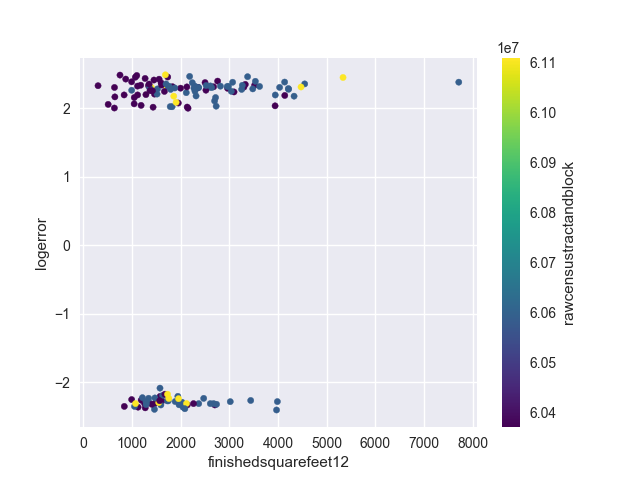

In [30]:
anamoly_df.plot.scatter('finishedsquarefeet12', 'logerror', c='rawcensustractandblock', 
                           colormap='viridis')

<IPython.core.display.Javascript object>


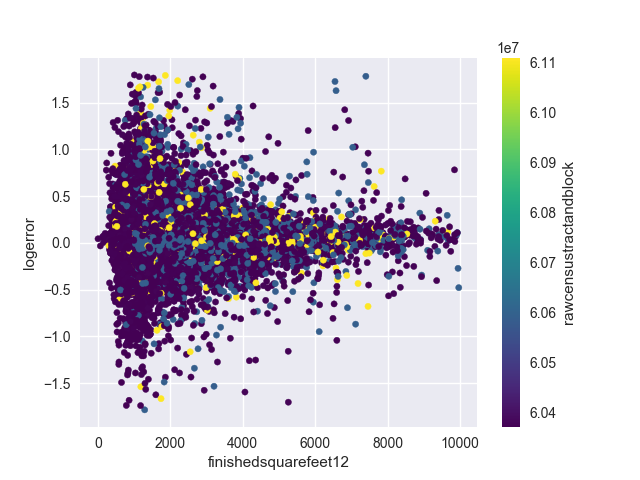

In [31]:
accurate_df.plot.scatter('finishedsquarefeet12', 'logerror', c='rawcensustractandblock', 
                           colormap='viridis')

<IPython.core.display.Javascript object>


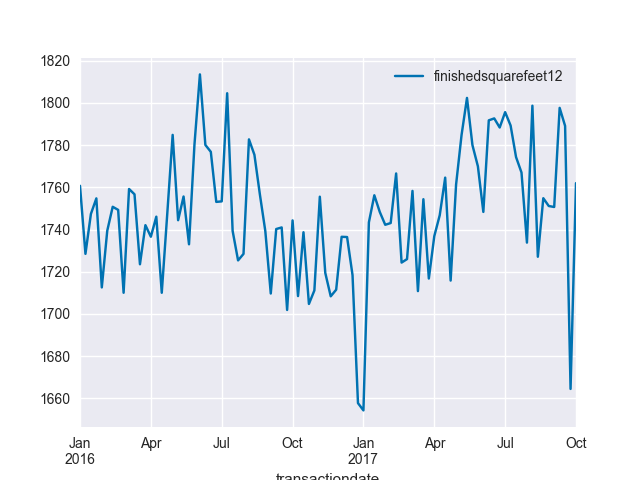

In [32]:
plt.style.use('seaborn-colorblind')
datedf = Housing_data[['finishedsquarefeet12','transactiondate']].dropna()
datedf = datedf.set_index('transactiondate').copy()
datedf.sort_index(inplace=True)
datedf = datedf.resample('W').mean()

datedf.plot();

<IPython.core.display.Javascript object>


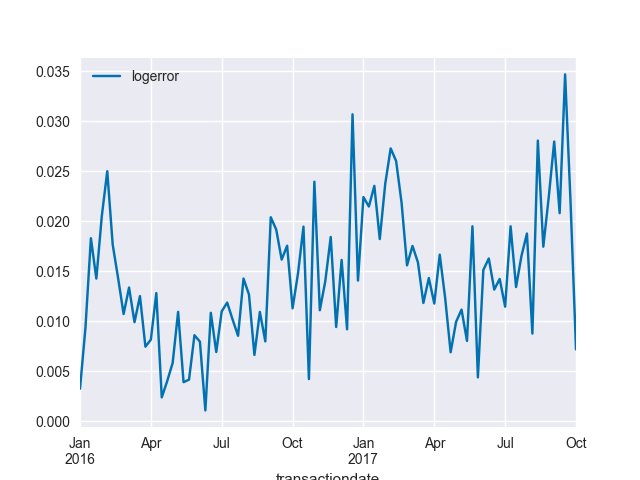

In [15]:
plt.style.use('seaborn-colorblind')
datedf = Housing_data[['logerror','transactiondate']].dropna()
datedf = datedf.set_index('transactiondate').copy()
datedf.sort_index(inplace=True)
datedf = datedf.resample('W').mean()

datedf.plot();

<IPython.core.display.Javascript object>


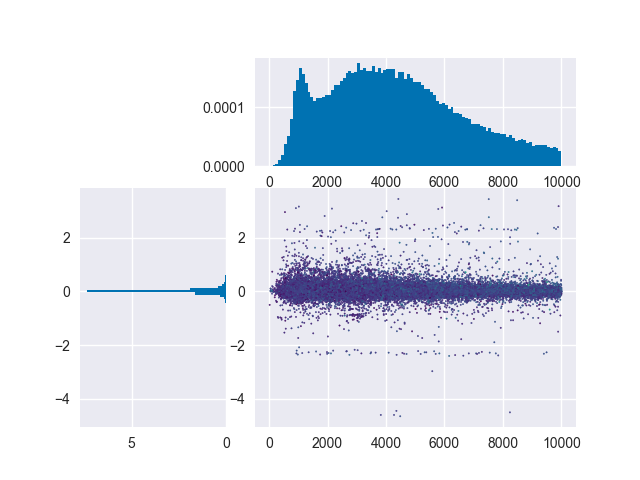

In [16]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

smallhousedf = Housing_data.drop(['taxdelinquencyyear'], axis = 1)
smallhousedf = smallhousedf.dropna()
smallhousedf=smallhousedf[smallhousedf['taxamount'] <= 10000]

lower_right.scatter(smallhousedf['taxamount'],smallhousedf['logerror'], 
                    c = smallhousedf['bedroomcnt'], s = 1, cmap = 'viridis')
#top_histogram.clear()
top_histogram.hist(smallhousedf['taxamount'], bins=100, normed = True)
#side_histogram.clear()
side_histogram.hist(smallhousedf['logerror'], bins=100, orientation='horizontal', normed = True)
side_histogram.invert_xaxis()

<IPython.core.display.Javascript object>


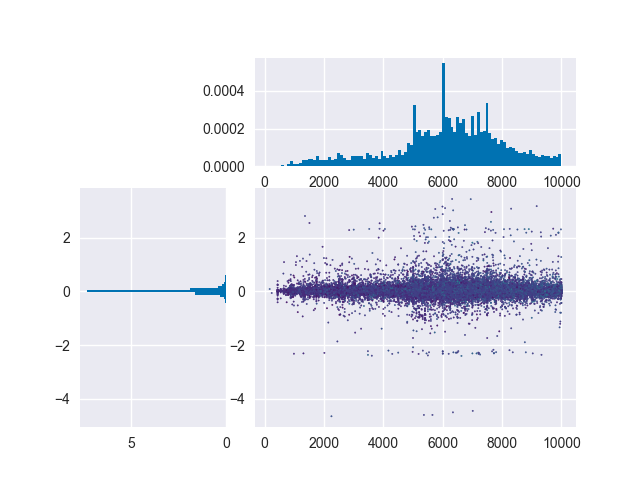

In [17]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

smallhousedf = Housing_data.drop(['taxdelinquencyyear'], axis = 1)
smallhousedf = smallhousedf.dropna()
smallhousedf=smallhousedf[smallhousedf['lotsizesquarefeet'] <= 10000]

lower_right.scatter(smallhousedf['lotsizesquarefeet'],smallhousedf['logerror'], 
                    c = smallhousedf['bedroomcnt'], s = 1, cmap = 'viridis')
#top_histogram.clear()
top_histogram.hist(smallhousedf['lotsizesquarefeet'], bins=100, normed = True)
#side_histogram.clear()
side_histogram.hist(smallhousedf['logerror'], bins=100, orientation='horizontal', normed = True)
side_histogram.invert_xaxis()

<IPython.core.display.Javascript object>


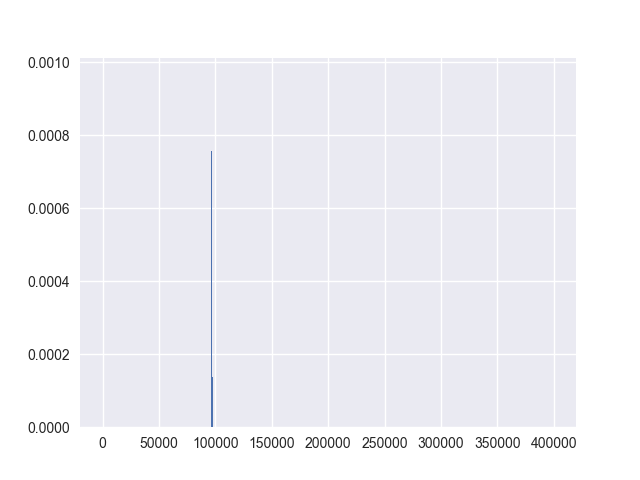

(array([  8.87432305e-08,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

In [19]:
plt.figure()
plt.hist(smallhousedf['regionidzip'], bins = 1000, normed = True)

In [17]:
smallhousedf['regionidzip'].unique()

array([ 97081,  97113,  97084,  97089,  97091,  97104,  97101,  97097,
        96383,  97118,  97116,  96385,  96393,  96389,  96342,  96337,
        96355,  96341,  96364,  96379,  96349,  96387,  96414,  96415,
        96424,  96412,  96450,  96451,  96452,  96449,  96437,  96436,
        96368,  96366,  96282,  96284,  96369,  96370,  96356,  96346,
        96339,  96401,  96378,  96398,  97328,  97330,  97331,  97329,
        97319,  97318,  97298,  96134,  96137,  96106,  96026,  96129,
        96095,  96103,  96124,  96117,  96047,  96128,  96127,  96006,
        96030,  96151,  96045,  96048,  96086,  96058,  96120,  96116,
        96024,  96043,  95997,  95999,  96000,  95992,  96038,  96023,
        96531,  96515,  96295,  96517,  96020,  96046,  96019,  96017,
        96027,  96049,  96008,  96321,  96325,  96324,  96292,  96289,
        96267,  96268,  96271,  96265,  96028,  96040,  96090,  96125,
        96101,  96220,  96083,  96192,  96197,  96206,  96215,  96242,
      